## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os
import datetime as datetime
import math as math

## Import data

In [2]:
df = pd.read_csv(os.path.join('data','bitstampUSD_data.csv'), usecols=('Timestamp', 'Weighted_Price'))

In [3]:
df.head()

,Timestamp,Weighted_Price
0,1325317920,4.39
1,1325317980,NaN
2,1325318040,NaN
3,1325318100,NaN
4,1325318160,NaN


## Data wrangling

In [4]:
def posornan(x):
    if x == 0:
        return np.nan
    else:
        return x

In [5]:
num_of_samples = 1000000
q_verbose = num_of_samples/25

# init
naninds = list()
nantimes = list()
nanhtimes = list()
nonnaninds = list()
nonnantimes = list()
nonnanhtimes = list()
nonnanprices = list()
dig1 = list()
dig12 = list()
dig2 = list()
dig3 = list()
dig4 = list()
dig5 = list()
dig6 = list()

subsample = np.linspace(1, len(df), num_of_samples)
numsample = len(subsample)

for x in range(numsample):
    i = int(math.floor(subsample[x])-1)
    
    if q_verbose > 0:
        if x % q_verbose == 0:
            print('sample # ' + str(x) + ' of ' + str(numsample))
            
    this_Timestamp = df['Timestamp'][i]
    this_hTimestamp = datetime.datetime.fromtimestamp(this_Timestamp)
    this_price = df['Weighted_Price'][i]
    is_nan = np.isnan(this_price)
    
    if is_nan:
        naninds.append(i)
        nantimes.append(this_Timestamp)
        nanhtimes.append(this_hTimestamp)
    else:
        nonnaninds.append(i)
        nonnantimes.append(this_Timestamp)
        nonnanhtimes.append(this_hTimestamp)        
        dig1.append(int(posornan(str(this_price*100)[0:1])))
        dig12.append(int(posornan(str(this_price*100)[0:2])))
        dig2.append(int(posornan(str(this_price*10000000000)[1:2])))
        dig3.append(int(posornan(str(this_price*10000000000)[2:3])))
        dig4.append(int(posornan(str(this_price*10000000000)[3:4])))
        dig5.append(int(posornan(str(this_price*10000000000)[4:5])))
        dig6.append(int(posornan(str(this_price*10000000000)[5:6])))
        nonnanprices.append(this_price)

dfnan = pd.DataFrame()
dfnan['inds'] = naninds
dfnan['times'] = nantimes
dfnan['htimes'] = nanhtimes

dfx = pd.DataFrame()
dfx['inds'] = nonnaninds
dfx['times'] = nonnantimes
dfx['htimes'] = nonnanhtimes
dfx['prices'] = nonnanprices
dfx['dig1'] = dig1
dfx['dig2'] = dig2
dfx['dig12'] = dig12
dfx['dig3'] = dig3
dfx['dig4'] = dig4
dfx['dig5'] = dig5
dfx['dig6'] = dig6

sample # 0 of 1000000
sample # 40000 of 1000000
sample # 80000 of 1000000
sample # 120000 of 1000000
sample # 160000 of 1000000
sample # 200000 of 1000000
sample # 240000 of 1000000
sample # 280000 of 1000000
sample # 320000 of 1000000
sample # 360000 of 1000000
sample # 400000 of 1000000
sample # 440000 of 1000000
sample # 480000 of 1000000
sample # 520000 of 1000000
sample # 560000 of 1000000
sample # 600000 of 1000000
sample # 640000 of 1000000
sample # 680000 of 1000000
sample # 720000 of 1000000
sample # 760000 of 1000000
sample # 800000 of 1000000
sample # 840000 of 1000000
sample # 880000 of 1000000
sample # 920000 of 1000000
sample # 960000 of 1000000


In [6]:
print(len(dfx))
dfx.head()

736905


,inds,times,htimes,prices,dig1,dig2,dig12,dig3,dig4,dig5,dig6
0,0,1325317920,2011-12-31 00:52:00,4.39,4,3,43,9,0,0,0
1,548,1325350800,2011-12-31 10:00:00,4.58,4,5,45,8,0,0,0
2,1224,1325391360,2011-12-31 21:16:00,4.58,4,5,45,8,0,0,0
3,3612,1325534640,2012-01-02 13:04:00,5.00,5,0,50,0,0,0,0
4,5545,1325650620,2012-01-03 21:17:00,4.93,4,9,49,3,0,0,0


In [7]:
print(len(dfx))
dfx.tail()

736905


,inds,times,htimes,prices,dig1,dig2,dig12,dig3,dig4,dig5,dig6
736900,4727757,1609371660,2020-12-30 16:41:00,28880.630730,2,8,28,8,8,0,6
736901,4727761,1609371900,2020-12-30 16:45:00,28845.828559,2,8,28,8,4,5,8
736902,4727766,1609372200,2020-12-30 16:50:00,28829.425958,2,8,28,8,2,9,4
736903,4727771,1609372500,2020-12-30 16:55:00,28810.597267,2,8,28,8,1,0,5
736904,4727776,1609372800,2020-12-30 17:00:00,28909.166061,2,8,28,9,0,9,1


In [8]:
print(len(dfnan))
dfnan.head()

263095


,inds,times,htimes
0,4,1325318160,2011-12-31 00:56:00
1,9,1325318460,2011-12-31 01:01:00
2,14,1325318760,2011-12-31 01:06:00
3,18,1325319000,2011-12-31 01:10:00
4,23,1325319300,2011-12-31 01:15:00


In [9]:
dfx['dig4'] = dig4

## Where are the NaNs? 

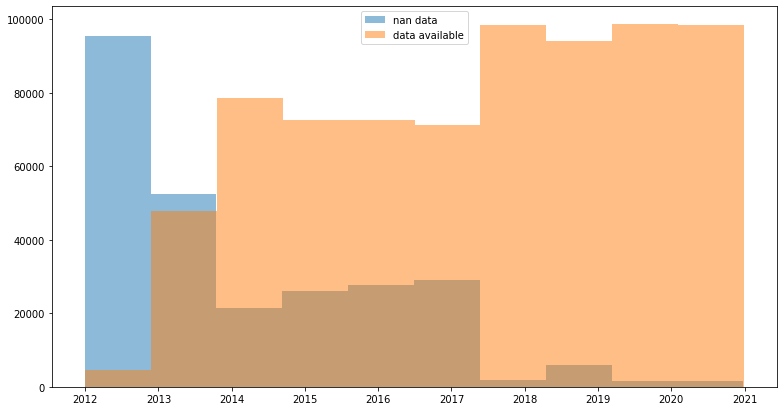

In [10]:
f = plt.figure(figsize=(13,7), facecolor='w')
tr_nan = plt.hist(dfnan['htimes'], alpha=0.5)
tr_nonnan = plt.hist(dfx['htimes'], alpha=0.5)
plt.legend(('nan data', 'data available'));

Unexpectedly lots of NaNs thorugh 2017. I'm going to make a (possibly unsound) assumption that the availability of data is statistically independent of the first digits (and vice versa)

## Glance at the trace

In [11]:
## Glance at the trace

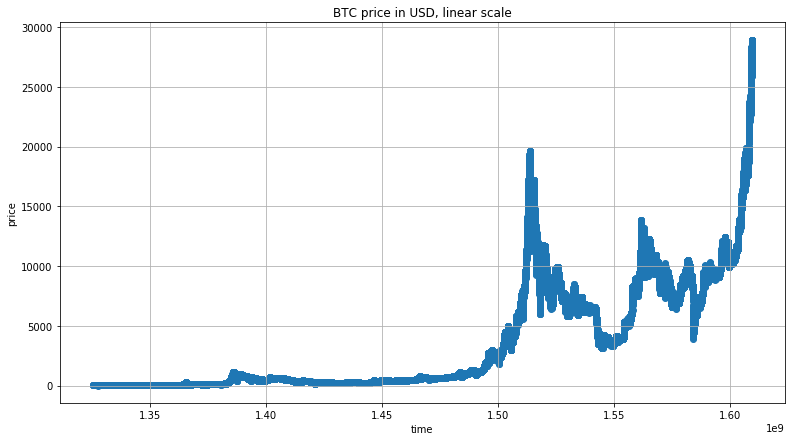

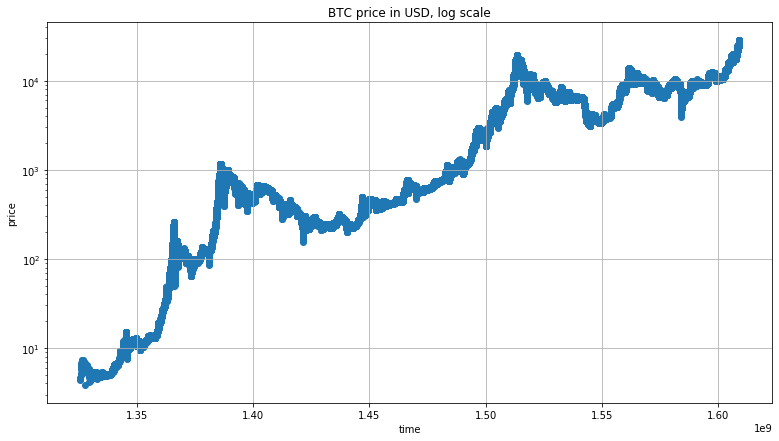

In [12]:
f = plt.figure(figsize=(13,7), facecolor='w')
plt.scatter(dfx['times'], dfx['prices'])
plt.xlabel('time')
plt.ylabel('price')
plt.title('')
plt.grid('on')
plt.yscale('linear')
plt.title('BTC price in USD, linear scale')

f = plt.figure(figsize=(13,7), facecolor='w')
plt.scatter(dfx['times'], dfx['prices'])
plt.xlabel('time')
plt.ylabel('price')
plt.title('')
plt.grid('on')
plt.yscale('log')
plt.title('BTC price in USD, log scale');

## What is the digit distribution?
Suppose bitcoin's price was a random, then over multiple orders of magnitude the distribution of each digit should be uniform. In other words, the price is just as likely to be something that starts with a "7" as 

### Leading digit

In [13]:
bins = range(1,11)

digs = list()
counts1 = list()
counts2 = list()

for bi in range(1,len(bins)):
    digs.append(bi)
    count1 = len(dfx[dfx['dig1']==bi])
    counts1.append(count1)
    count2 = len(dfx[dfx['dig2']==bi])
    counts2.append(count2)
    print('Leading digit: "' + str(bi) + '" has ' + str(count1) + ' instances ... (and ' + str(count2) + ' as 2nd digit)')

Leading digit: "1" has 157503 instances ... (and 99375 as 2nd digit)
Leading digit: "2" has 92093 instances ... (and 92080 as 2nd digit)
Leading digit: "3" has 79671 instances ... (and 87280 as 2nd digit)
Leading digit: "4" has 74310 instances ... (and 66246 as 2nd digit)
Leading digit: "5" has 48213 instances ... (and 67608 as 2nd digit)
Leading digit: "6" has 89722 instances ... (and 57492 as 2nd digit)
Leading digit: "7" has 65087 instances ... (and 66504 as 2nd digit)
Leading digit: "8" has 62571 instances ... (and 56597 as 2nd digit)
Leading digit: "9" has 67735 instances ... (and 50690 as 2nd digit)


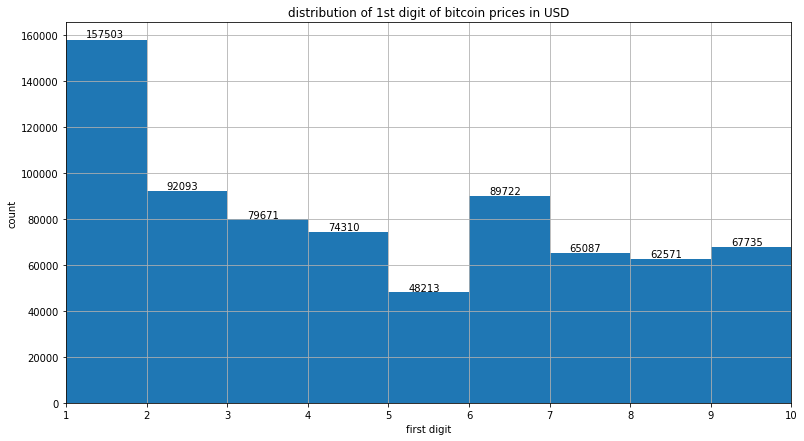

In [14]:
f = plt.figure(figsize=(13,7), facecolor='w')
tr_nan = plt.hist(dfx['dig1'], bins = bins)
plt.xlabel('first digit')
plt.ylabel('count')
plt.title('distribution of 1st digit of bitcoin prices in USD')
plt.grid('on')
plt.xlim((1,10));

for x in range(len(digs)):
    plt.text(digs[x]+0.25, counts1[x]*1.01, str(counts1[x]))

The above plot shows us that, for example, there were nearly 1600000 instances that the price started with a '1', and only about 650000 instances where the price started with a '7'

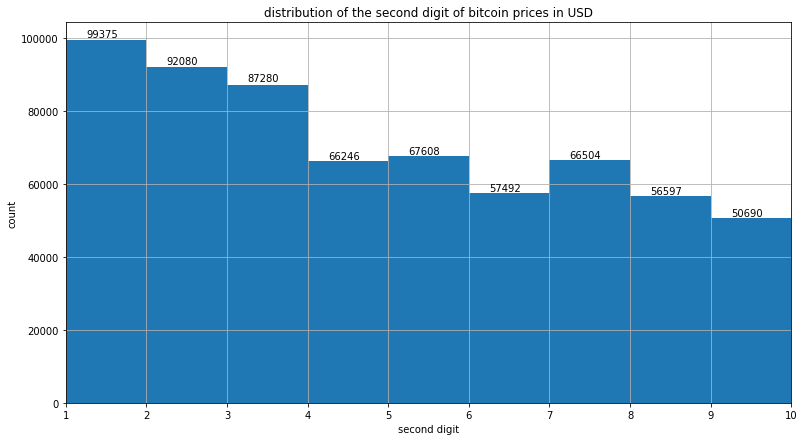

In [15]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,11)
tr_nan = plt.hist(dfx['dig2'], bins = bins)
plt.xlabel('second digit')
plt.ylabel('count')
plt.title('distribution of the second digit of bitcoin prices in USD');
plt.grid('on')
plt.xlim((1,10));

for x in range(len(digs)):
    plt.text(digs[x]+0.25, counts2[x]*1.01, str(counts2[x]))
    

Let's look at some less significant digits to see if this is meaningful or not

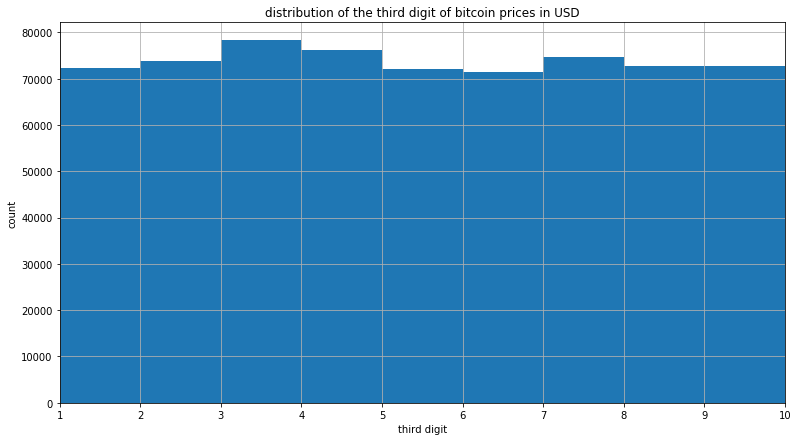

In [16]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,11)
tr_nan = plt.hist(dfx['dig3'], bins = bins)
plt.xlabel('third digit')
plt.ylabel('count')
plt.title('distribution of the third digit of bitcoin prices in USD');
plt.grid('on')
plt.xlim((1,10));

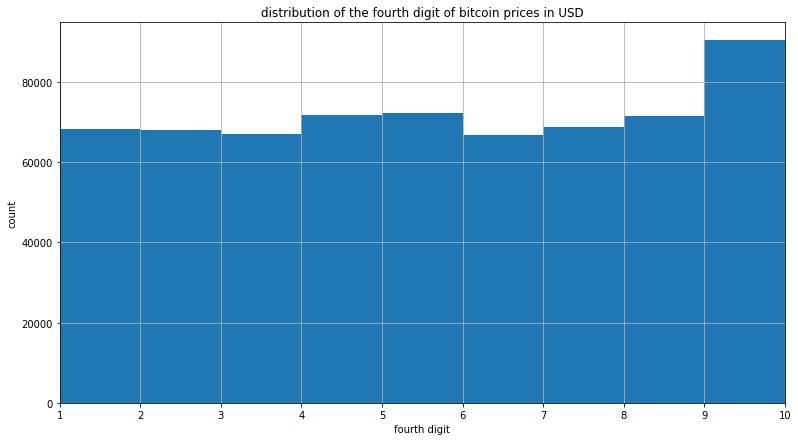

In [17]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,11)
tr_nan = plt.hist(dfx['dig4'], bins = bins)
plt.xlabel('fourth digit')
plt.ylabel('count')
plt.title('distribution of the fourth digit of bitcoin prices in USD');
plt.grid('on')
plt.xlim((1,10));

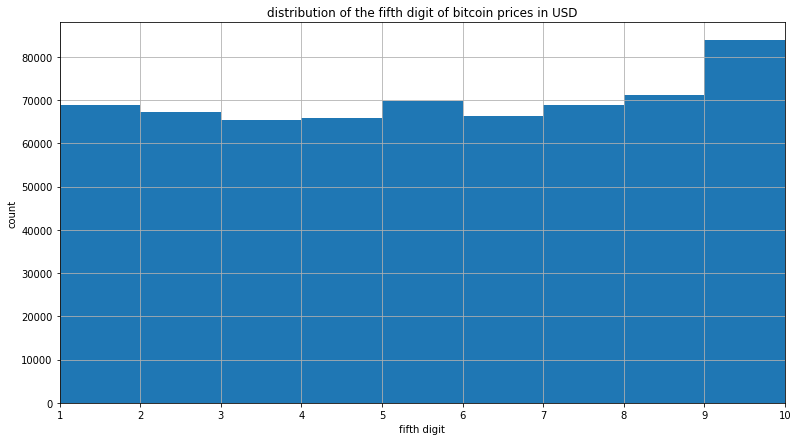

In [18]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,11)
tr_nan = plt.hist(dfx['dig5'], bins = bins)
plt.xlabel('fifth digit')
plt.ylabel('count')
plt.title('distribution of the fifth digit of bitcoin prices in USD');
plt.grid('on')
plt.xlim((1,10));

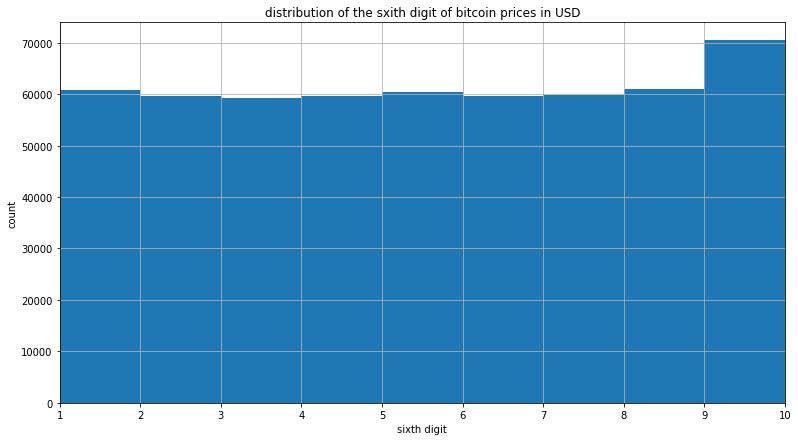

In [19]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,11)
tr_nan = plt.hist(dfx['dig6'], bins = bins)
plt.xlabel('sixth digit')
plt.ylabel('count')
plt.title('distribution of the sxith digit of bitcoin prices in USD');
plt.grid('on')
plt.xlim((1,10));

What if we look at the first two digits?

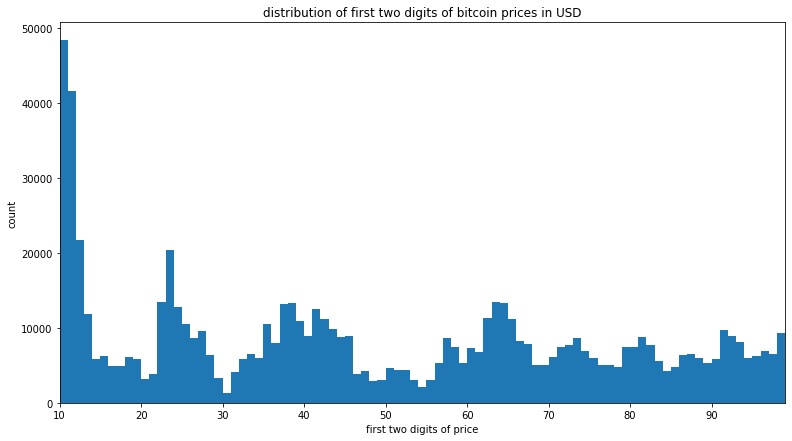

In [20]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,100)
tr_nan = plt.hist(dfx['dig12'], bins = bins)
plt.xlabel('first two digits of price')
plt.ylabel('count')
plt.title('distribution of first two digits of bitcoin prices in USD')
plt.xlim(10,99);

The above plot shows that the price has a propensity to hover between starting with '10...' and '15...'

## Time dependence

Do these trends change?

In [21]:
complete_years = range(2012,2020+1)

In [22]:
dfx.tail()

,inds,times,htimes,prices,dig1,dig2,dig12,dig3,dig4,dig5,dig6
736900,4727757,1609371660,2020-12-30 16:41:00,28880.630730,2,8,28,8,8,0,6
736901,4727761,1609371900,2020-12-30 16:45:00,28845.828559,2,8,28,8,4,5,8
736902,4727766,1609372200,2020-12-30 16:50:00,28829.425958,2,8,28,8,2,9,4
736903,4727771,1609372500,2020-12-30 16:55:00,28810.597267,2,8,28,8,1,0,5
736904,4727776,1609372800,2020-12-30 17:00:00,28909.166061,2,8,28,9,0,9,1


In [24]:
for yi in range(len(complete_years)):
    pass

## Model and backtest

In [37]:
digit = 4
btcbal = 1
btcbalvec = list()
btctimes = list()
usdbal = 0
usdbalvec = list()
usdtimes = list()
q_verbose = 10000

this_df = dfx

for ti in range(len(this_df)):
    this_price = this_df['prices'][ti]
    this_time = this_df['times'][ti]
    this_htime = this_df['htimes'][ti]
    
    if dfx['dig' + str(digit)][ti] == 8:
        # Buy BTC with USD
        if usdbal > 0:
            btcbal = usdbal/this_price
            usdbal = 0
            
            btctimes.append(this_time)
            btcbalvec.append(btcbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted USD to BTC at ' + str(this_price) + ' // total bal in BTC: ' + str(btcbal))
                
                
    elif dfx['dig' + str(digit)][ti] == 9:
        # Sell BTC for USD
        if btcbal > 0:
            cachebal = btcbal
            usdbal = btcbal*this_price
            btcbal = 0
            
            usdtimes.append(this_time)
            usdbalvec.append(usdbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted BTC to USD at ' + str(this_price) + ' // total bal in BTC: ' + str(cachebal))

[2014-04-16 01:20:00] Converted BTC to USD at 529.93864051 // total bal in BTC: 0.06557419611721801
[2015-09-06 11:20:00] Converted USD to BTC at 239.86506594 // total bal in BTC: 0.08423740531707619
[2016-01-17 16:36:00] Converted USD to BTC at 382.87 // total bal in BTC: 0.05814161831465979
[2016-09-13 21:52:00] Converted BTC to USD at 606.98094724 // total bal in BTC: 0.027922950917184056
[2016-12-29 00:16:00] Converted USD to BTC at 972.8 // total bal in BTC: 0.018775785909896002
[2019-12-06 23:00:00] Converted USD to BTC at 7568.24 // total bal in BTC: 0.005790817976152677
[2020-02-11 04:52:00] Converted USD to BTC at 9788.5908032 // total bal in BTC: 0.005490756112471789
[2020-12-08 00:40:00] Converted USD to BTC at 19182.483407 // total bal in BTC: 0.0055212793505992844


Text(0.5, 1.0, 'Balance in BTC over time')

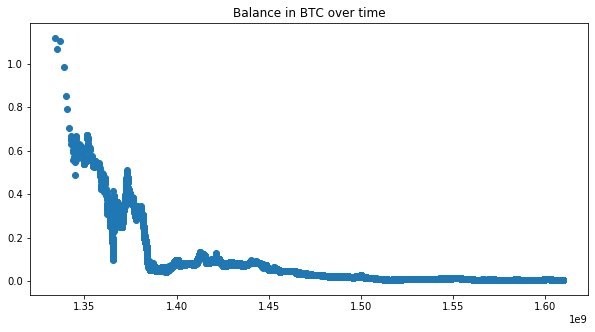

In [38]:
f = plt.figure(figsize=(10,5), facecolor='w')
plt.scatter(btctimes, btcbalvec)
plt.title('Balance in BTC over time')

Text(0.5, 1.0, 'Balance in USD over time')

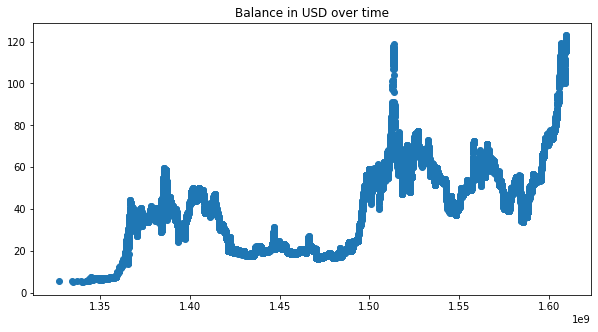

In [39]:
f = plt.figure(figsize=(10,5), facecolor='w')
plt.scatter(usdtimes, usdbalvec)
plt.title('Balance in USD over time')

5th digit

In [40]:
digit = 5
btcbal = 1
btcbalvec = list()
btctimes = list()
usdbal = 0
usdbalvec = list()
usdtimes = list()
q_verbose = 10000

this_df = dfx

for ti in range(len(this_df)):
    this_price = this_df['prices'][ti]
    this_time = this_df['times'][ti]
    this_htime = this_df['htimes'][ti]
    
    if dfx['dig' + str(digit)][ti] == 8:
        # Buy BTC with USD
        if usdbal > 0:
            btcbal = usdbal/this_price
            usdbal = 0
            
            btctimes.append(this_time)
            btcbalvec.append(btcbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted USD to BTC at ' + str(this_price) + ' // total bal in BTC: ' + str(btcbal))
                
                
    elif dfx['dig' + str(digit)][ti] == 9:
        # Sell BTC for USD
        if btcbal > 0:
            cachebal = btcbal
            usdbal = btcbal*this_price
            btcbal = 0
            
            usdtimes.append(this_time)
            usdbalvec.append(usdbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted BTC to USD at ' + str(this_price) + ' // total bal in BTC: ' + str(cachebal))

[2013-12-20 01:13:00] Converted BTC to USD at 707.29913174 // total bal in BTC: 0.05983281680861503
[2014-09-07 10:19:00] Converted USD to BTC at 480.88 // total bal in BTC: 0.022889269624713098
[2015-10-25 22:00:00] Converted BTC to USD at 284.49365693 // total bal in BTC: 0.01706584702591733
[2016-09-13 21:52:00] Converted USD to BTC at 606.98094724 // total bal in BTC: 0.007538990011696157
[2017-03-20 12:41:00] Converted USD to BTC at 1042.8952514 // total bal in BTC: 0.0038564688768961616
[2017-04-29 06:26:00] Converted USD to BTC at 1317.86 // total bal in BTC: 0.004166242402624363
[2018-08-10 04:15:00] Converted BTC to USD at 6372.9287509999995 // total bal in BTC: 0.0018941712251308728
[2019-02-06 23:02:00] Converted USD to BTC at 3372.8536295999997 // total bal in BTC: 0.001862552063220741


Text(0.5, 1.0, 'Balance in BTC over time')

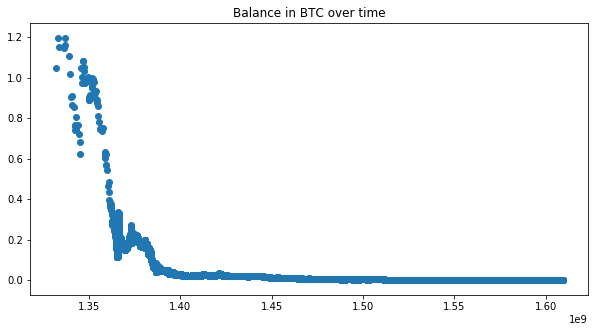

In [41]:
f = plt.figure(figsize=(10,5), facecolor='w')
plt.scatter(btctimes, btcbalvec)
plt.title('Balance in BTC over time')

6th digit

In [42]:
digit = 6
btcbal = 1
btcbalvec = list()
btctimes = list()
usdbal = 0
usdbalvec = list()
usdtimes = list()
q_verbose = 10000

this_df = dfx

for ti in range(len(this_df)):
    this_price = this_df['prices'][ti]
    this_time = this_df['times'][ti]
    this_htime = this_df['htimes'][ti]
    
    if dfx['dig' + str(digit)][ti] == 8:
        # Buy BTC with USD
        if usdbal > 0:
            btcbal = usdbal/this_price
            usdbal = 0
            
            btctimes.append(this_time)
            btcbalvec.append(btcbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted USD to BTC at ' + str(this_price) + ' // total bal in BTC: ' + str(btcbal))
                
                
    elif dfx['dig' + str(digit)][ti] == 9:
        # Sell BTC for USD
        if btcbal > 0:
            cachebal = btcbal
            usdbal = btcbal*this_price
            btcbal = 0
            
            usdtimes.append(this_time)
            usdbalvec.append(usdbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted BTC to USD at ' + str(this_price) + ' // total bal in BTC: ' + str(cachebal))

[2014-07-23 03:18:00] Converted BTC to USD at 619.68 // total bal in BTC: 0.544894814789744
[2017-03-20 12:41:00] Converted BTC to USD at 1042.8952514 // total bal in BTC: 0.35736363153264156
[2017-07-07 07:17:00] Converted BTC to USD at 2524.4972618 // total bal in BTC: 0.24996230480064427
[2019-05-21 17:56:00] Converted BTC to USD at 7970.8946865 // total bal in BTC: 0.054424274964003636


Text(0.5, 1.0, 'Balance in BTC over time')

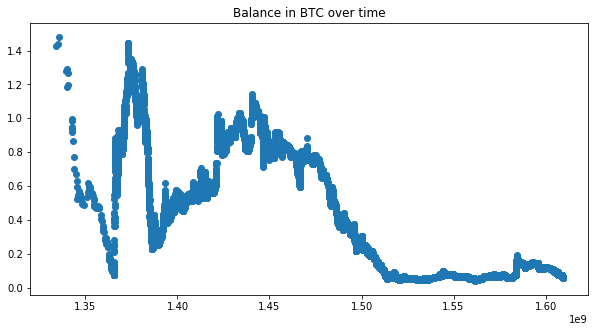

In [43]:
f = plt.figure(figsize=(10,5), facecolor='w')
plt.scatter(btctimes, btcbalvec)
plt.title('Balance in BTC over time')